In [1]:
# https://docs.pymc.io/notebooks/getting_started.html

In [2]:
import pymc3 as pm

/home/kawahara/anaconda3/lib/python3.7/site-packages/distributed/utils.py:139: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [10]:
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [11]:
pm.__version__=="3.8"

True

In [5]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0,shape=2, sigma=10)
    #sigma = pm.HalfNormal('sigma', sigma=1)
    logsigma = pm.Uniform("logsigma", -5, 5)
    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu,observed=Y, sigma=np.exp(logsigma))


In [6]:
#MAP
map_estimate = pm.find_MAP(model=basic_model)

In [7]:
map_estimate

{'alpha': array(0.90659862),
 'beta': array([0.94848608, 2.60705926]),
 'logsigma_interval__': array(-0.01323974),
 'logsigma': array(-0.03309887)}

In [11]:

with basic_model:

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step)


#with basic_model:
#    # draw 500 posterior samples
#    trace = pm.sample(500)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [logsigma]
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 7 seconds.


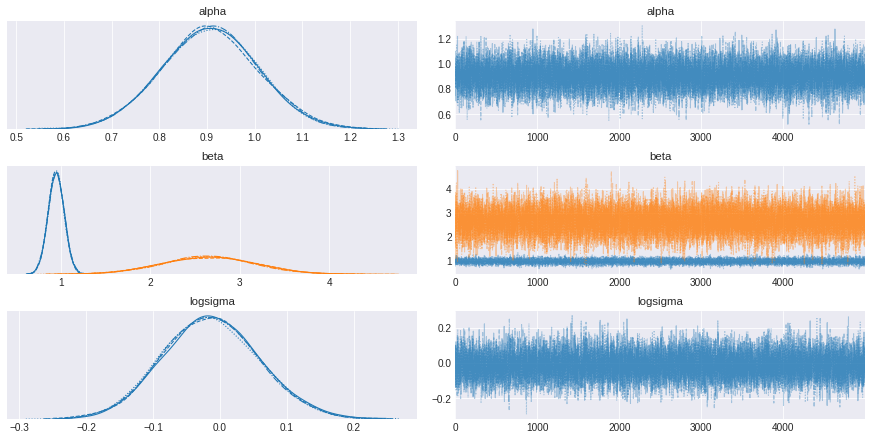

In [12]:

pm.traceplot(trace);



## Random Sampling from a distribution

In [ ]:
#https://docs.pymc.io/Probability_Distributions.html

In [23]:
with pm.Model():
    x = pm.Normal('x', mu=0, sigma=1)

In [25]:
x.random(size=10)

array([-0.83254478, -2.10661441, -0.65833683, -0.97353646,  1.24155565,
       -1.47687923,  0.10289779,  0.73392596,  1.23883849,  0.34512176])